In [75]:
import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

In [76]:
x = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]) #impulse
feedback = 0

In [77]:
out = np.zeros(34)
acc1 = 0
acc2 = 0
for i in range (0, 33):
    if(acc2 > 0):
        feedback = 8191
    else:
        feedback = -8191
    #if(out == 0) feedback =0
        
    acc2 = acc1 - feedback + acc2
    acc1 = x[i] - feedback + acc1
    
    #print(acc2)
    
    acc2_bin = bin(acc2)
    if(acc2_bin == "0b0"):
        acc2_bin = "0b0000"
    #print(acc2_bin[2:6])
    out_bin = int(acc2_bin[3:6],2)
    if(acc2_bin[2]):
        out_bin = out_bin * (-1)
    #print(out_bin)
    out[i+1] = out_bin

In [78]:
out

array([ 0., -7., -7.,  0.,  0., -7., -7.,  0.,  0., -7., -7.,  0.,  0.,
       -7., -7.,  0.,  0., -7., -7., -7., -7., -7., -7., -7., -7., -7.,
       -7., -7., -7., -7., -7., -7., -7., -7.])

In [79]:
X = fft(x)
Y = fft(out[1:])

In [80]:
H = Y/X #prenosna funkcija
Hdb = 20*np.log(abs(H))

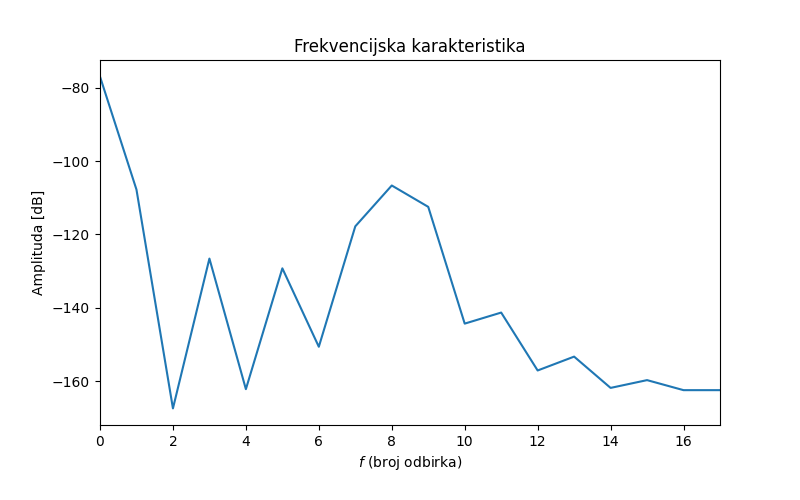

In [82]:
F = np.arange(0,33)
plt.figure(figsize=(8,5))
plt.title("Frekvencijska karakteristika")
plt.xlabel('$f$ (broj odbirka)')
plt.ylabel('Amplituda [dB]')
plt.subplots_adjust(bottom=0.15)
plt.xlim([0,17])
plt.plot(F,Hdb);
plt.show();